In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

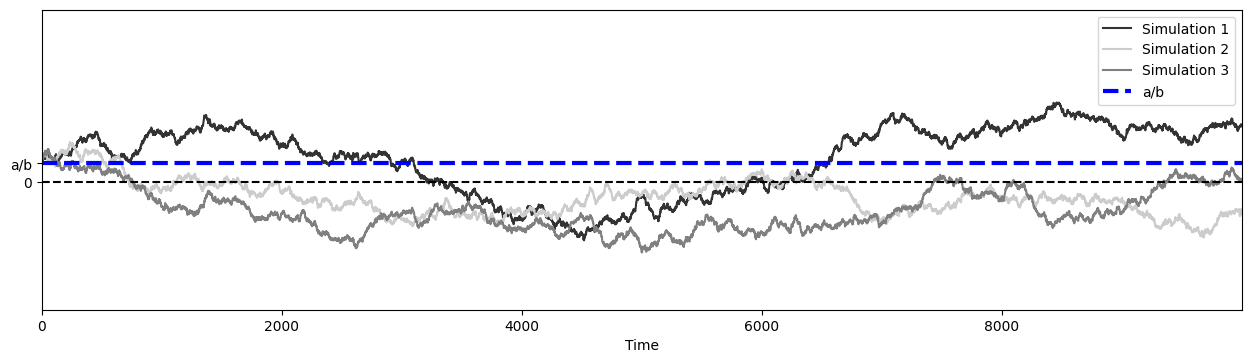

In [2]:
N = 10000
t = np.arange(N)
dt = 1.0 / N
nsim = 50
a, b, sigma = 0.025, 1, 0.1

dB = np.random.normal(0, np.sqrt(dt), size=(nsim, N))
R = np.zeros((nsim, N))
R[:, 0] = 0.03

for i in range(nsim):
    for j in range(1, N):
        R[i, j] = R[i, j - 1] + (a - b * R[i, j - 1]) * dt + sigma * dB[i, j]

plt.figure(figsize=(12, 3))
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.margins(x=0)
plt.plot(t, R[0, :], label='Simulation 1', color='0.2')
plt.plot(t, R[1, :], label='Simulation 2', color='0.8')
plt.plot(t, R[2, :], label='Simulation 3', color='0.5')
plt.axhline(y=a/b, color='blue', linewidth=3, label='a/b', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Time')
plt.ylabel('')
plt.ylim(R[0, 0] - 0.2, R[0, 0] + 0.2)
plt.yticks([a/b, 0], labels=['a/b', '0'])
plt.legend()
plt.show()


<Axes: >

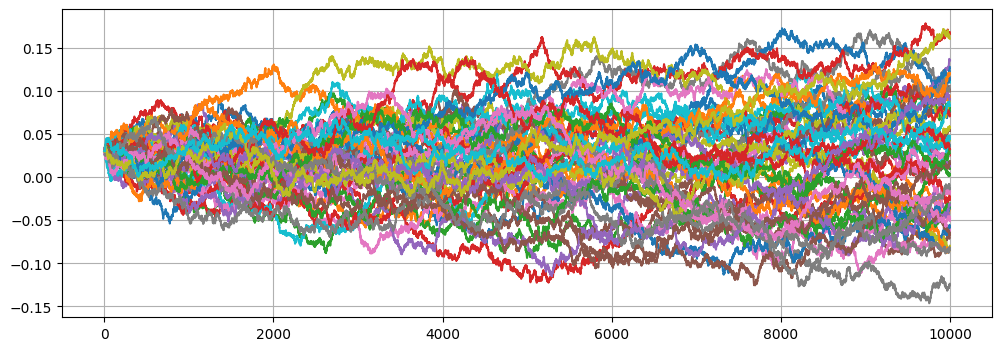

In [3]:
pd.DataFrame(R).transpose().plot(legend=False, figsize=(12,4), grid=True)

In [4]:
print(R[:,-1].mean())
print(R[:,-1].std())

0.026520014242554155
0.07161513527067427


In [5]:
a/b

0.025

In [6]:
np.sqrt(sigma ** 2 / (2 * b))

0.07071067811865477

In [7]:
dB.shape

(50, 10000)

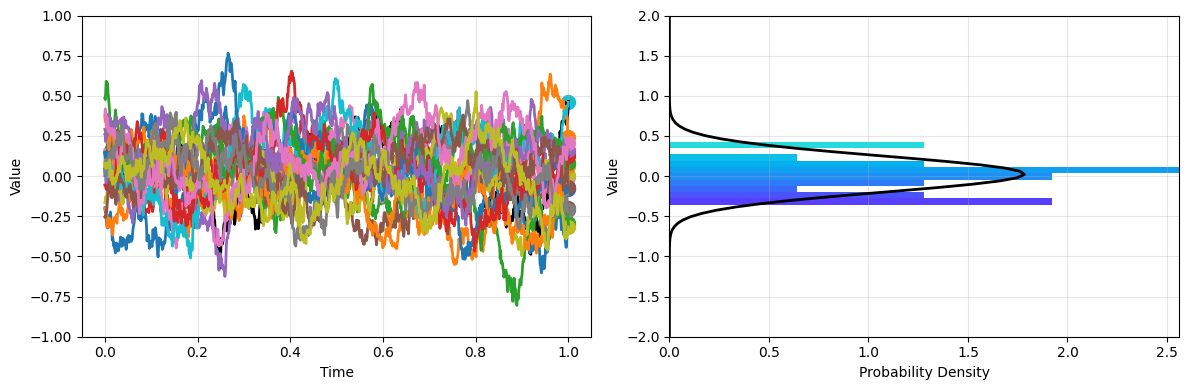

In [8]:
a = 0.25
b = 10
sigma = 1
N = 1000
t = np.arange(N+1)
dt = 1.0 / N
nsim = 20

dB = np.random.normal(0, np.sqrt(dt), (nsim, N))
Y = np.zeros((nsim, N+1))

for i in range(nsim):
    Y[i, 0] = np.random.normal(a/b, np.sqrt(sigma**2/(2*b)))
    for j in range(1, N+1):
        Y[i, j] = Y[i, j-1] + (a - b*Y[i, j-1])*dt + sigma*dB[i, j-1]

H, bins = np.histogram(Y[:, N], bins=10, density=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(t*dt, Y[0, :], color='black', linewidth=2)
# , label='Simulation 1'
for i in range(1, nsim):
    axes[0].plot(t*dt, Y[i, :], linewidth=2)
    # , label=f'Simulation {i+1}'
    axes[0].scatter(1.0, Y[i, N], marker='o', s=100)
# label=f'Simulation {i+1} at t=N'
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].set_ylim(-1, 1)
# axes[0].legend()
axes[0].grid(alpha = 0.3)


colors = plt.cm.rainbow(np.linspace(0.08, 0.6, nsim))
axes[1].barh(bins[:-1], H, height=np.diff(bins), color=colors)
x = np.linspace(-2, 2, 100)
px = np.exp(-0.5*((x - a/b)/(np.sqrt(sigma**2/(2*b))))**2) / (np.sqrt(2*np.pi*sigma**2/(2*b)))
axes[1].plot(px, x, color='black', linestyle='-', linewidth=2)
axes[1].set_xlim(0, max(np.max(px), np.max(H)))
axes[1].set_ylim(-2, 2)
axes[1].set_xlabel('Probability Density')
axes[1].set_ylabel('Value')
axes[1].grid(alpha = 0.3)

plt.tight_layout()
plt.show()

In [9]:
import mplfinance as mpf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.951,1.965,1.914,1.960,1.960,0
2012-01-04,1.937,2.012,1.933,1.995,1.995,0
2012-01-05,1.991,2.021,1.944,1.993,1.993,0
2012-01-06,2.003,2.044,1.946,1.961,1.961,0
2012-01-09,1.975,1.986,1.919,1.960,1.960,0
...,...,...,...,...,...,...
2024-01-09,4.047,4.053,3.996,4.019,4.019,0
2024-01-10,3.992,4.038,3.985,4.030,4.030,0
2024-01-11,3.994,4.068,3.973,3.977,3.977,0


[*********************100%%**********************]  1 of 1 completed
Number of non-missing values: 3026


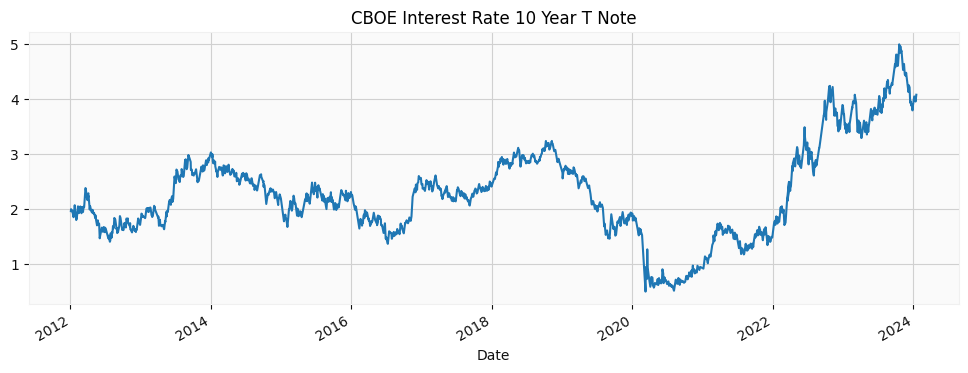

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Download historical yield data
symbol = "^TNX"
start_date = "2012-01-01"
end_date = "2024-01-17"
data = yf.download(symbol, start=start_date, end=end_date)

# Extract adjusted closing prices and remove missing values
rate_df = data[['Open', 'High', 'Low', 'Adj Close']].dropna()

# Plotting the chart
rate_df['Adj Close'].plot(figsize=(12,4), title='CBOE Interest Rate 10 Year T Note')

# Get the length of non-missing values
n = len(rate_df)
print("Number of non-missing values:", n)


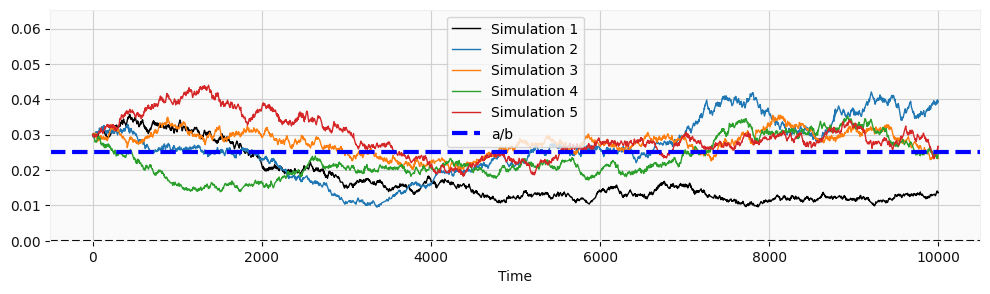

In [10]:
N = 10000
t = np.arange(N)
dt = 1.0 / N
nsim = 5
a = 0.025
b = 1
sigma = 0.1
sd = np.sqrt(sigma**2 / (2 * b))
R = np.zeros((nsim, N))
R[:, 0] = 0.03
X = np.random.normal(0, np.sqrt(dt), (nsim, N))

for i in range(nsim):
    for j in range(1, N):
        R[i, j] = max(0, R[i, j-1] + (a - b * R[i, j-1]) * dt + sigma * np.sqrt(R[i, j-1]) * X[i, j])

plt.figure(figsize=(12, 3))
plt.plot(t, R[0, :], label="Simulation 1", color='black', linewidth=1)
for i in range(1, nsim):
    plt.plot(t, R[i, :], label=f"Simulation {i+1}", linewidth=1)

plt.xlabel("Time")
plt.ylabel("")
plt.ylim(0, R[0, 0] + sd / 2)
plt.axhline(y=a/b, color="blue", linewidth=3, label="a/b", linestyle="--")
plt.axhline(y=0, color="black", linestyle="--")
plt.axis('on')
plt.legend()
plt.show()


In [16]:
rate = rate_df['Adj Close']
ratek = np.array(rate)
ratekplus1 = np.concatenate((ratek[1:], [0]))

n = len(ratek)
oneminusbdt = (np.sum(ratek * ratekplus1) - np.sum(ratek) * np.sum(ratekplus1) / n) / (np.sum(ratek * ratek) - np.sum(ratek) * np.sum(ratek) / n)
adt = np.sum(ratekplus1) / n - oneminusbdt * np.sum(ratek) / n
sigmadt = np.sqrt(np.sum((ratekplus1 - oneminusbdt * ratek - adt)**2) / n)

print("oneminusbdt:", oneminusbdt)
print("adt:", adt)
print("sigmadt:", sigmadt)


oneminusbdt: 0.9953909530372889
adt: 0.009835615417497667
sigmadt: 0.09008236795577093


In [12]:
N = len(rate)
t = np.arange(N)
dt = N / 1000
nsim = 3
a, b, sigma = adt/dt, (oneminusbdt - 1)/-dt, sigmadt/dt

dB = np.random.normal(0, np.sqrt(dt), size=(nsim, N))
R = np.zeros((nsim, N))
R[:, 0] = rate.iloc[0]

for i in range(nsim):
    for j in range(1, N):
        R[i, j] = R[i, j - 1] + (a - b * R[i, j - 1]) * dt + sigma * dB[i, j]

<Axes: xlabel='Date'>

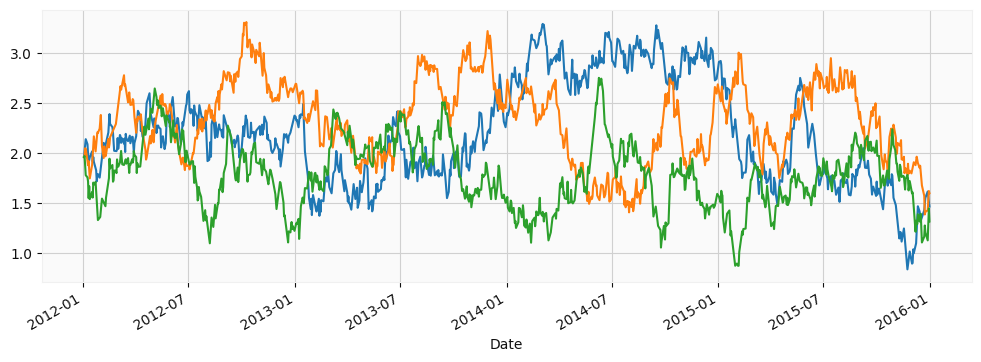

In [13]:
simR  = pd.DataFrame(R, columns=data.index).transpose()
simR.plot(legend=False, figsize=(12, 4))

Text(0, 0.5, 'Yield')

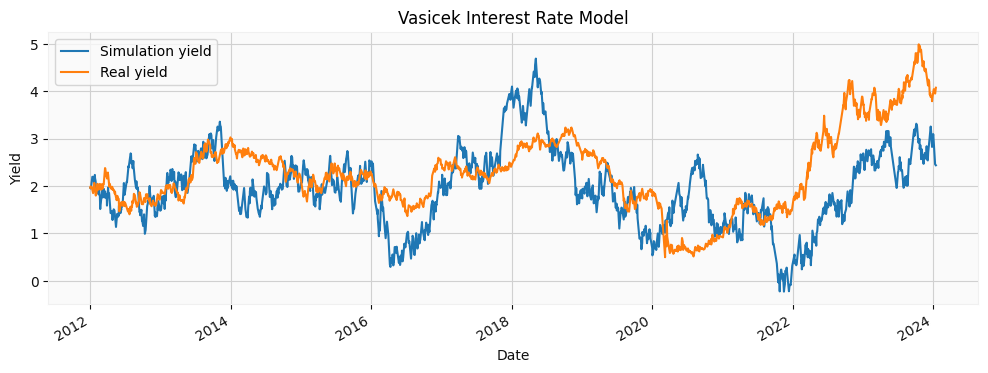

In [58]:
import statsmodels.api as sm
import time

arparams = np.array([oneminusbdt])
maparams = np.array([.0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ar_sim = sm.tsa.arma_generate_sample(ar, ma, n)

y = adt / oneminusbdt + sigmadt * ar_sim
y = y + rate.iloc[0] - y[0]

sim_yield = pd.Series(y, index=pd.to_datetime(rate.index))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sim_yield.plot(ax = axes, title='Vasicek Interest Rate Model')
rate.plot(ax = axes)
axes.legend(['Simulation yield','Real yield'])
axes.set_ylabel('Yield')

In [63]:
ar_sim.std()

9.024991526333157

In [72]:
dt = 252/n
dt=1/252
sigmadt/dt/(2*(1-oneminusbdt)/dt)

9.772342165806723

In [62]:
(ar_sim[1:]-ar_sim[:-1]).mean()

0.001754293392570369

[*********************100%%**********************]  1 of 1 completed


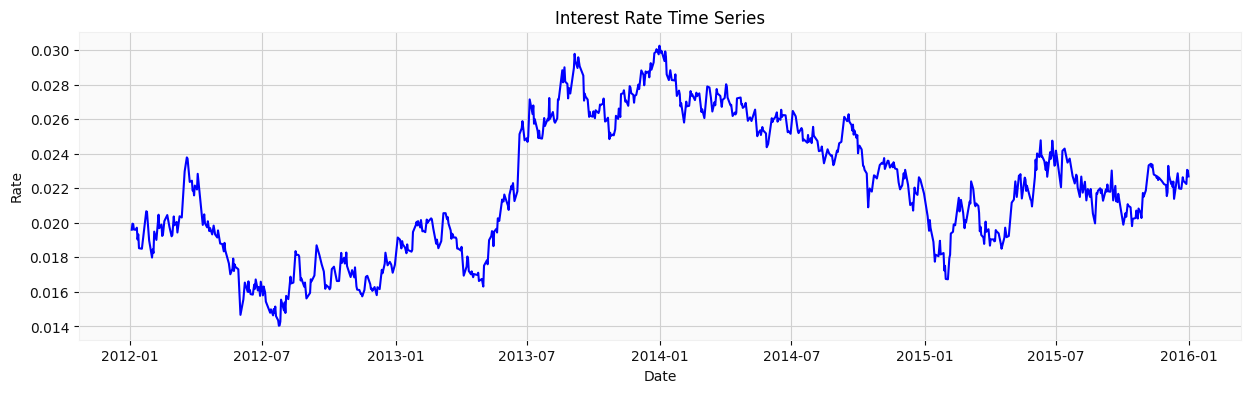

<Figure size 1500x400 with 0 Axes>

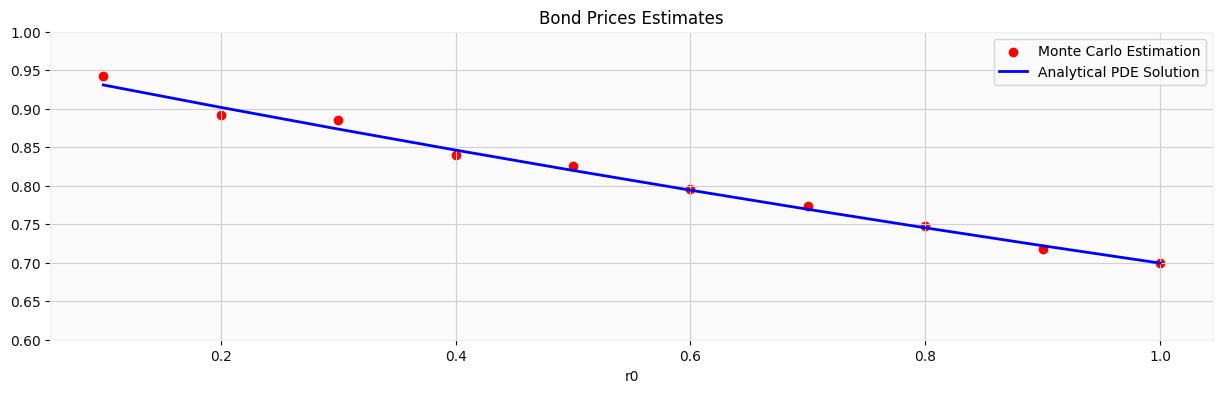

In [33]:
# Fetching data
data = yf.download("^TNX", start="2012-01-01", end="2016-01-01")
rate = 0.01 * data['Adj Close'].dropna()

# Plotting
plt.figure(figsize=(15, 4))
plt.plot(rate.index, rate.values, color='blue')
plt.title('Interest Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()

N = len(rate)
dt = 1.0 / 365

ratek = rate.values
ratekplus1 = np.append(ratek[1:], 0)
b = (1 - ((np.sum(ratek * ratekplus1) - np.sum(ratek) * np.sum(ratekplus1) / N) /
          (np.sum(ratek * ratek) - np.sum(ratek) * np.sum(ratek) / N))) / dt
a = (np.sum(ratekplus1) - (1 - b * dt) * np.sum(ratek)) / N / dt
sigma = np.sqrt(np.sum((ratekplus1 - (1 - b) * ratek - a) ** 2) / N) / np.sqrt(dt)

t = np.arange(N)
nval = 10
nsim = 200
bprice = np.zeros(nval)
r = np.zeros(nval)
R = np.zeros((nsim, N))

plt.figure(figsize=(15, 4))

for n in range(1, nval + 1):
    X = np.random.normal(0, np.sqrt(dt), (nsim, N))
    r[n - 1] = n / 10
    for i in range(nsim):
        R[i, 0] = r[n - 1]
        for j in range(1, N):
            R[i, j] = R[i, j - 1] + (a - b * R[i, j - 1]) * dt + sigma * X[i, j]
        bprice[n - 1] += np.exp(-np.sum(R[i, :]) * dt)
        # plt.plot(t, R[i, :], label=f"r0={r[n - 1]}, n={n}, Sum / {i}",
        #          color='blue', linestyle='-', linewidth=2)
        # plt.axhline(y=a / b, color='purple', linestyle='-', linewidth=2)
        # plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
        # plt.xlabel('Time')
        # plt.ylabel('')
        # plt.ylim(-0.4, 0.6)
        # plt.legend()
        # plt.show(block=False)
        # plt.pause(1.0)
    bprice[n - 1] /= nsim
    # print(n)

T = N / 365
C = -(1 - np.exp(-b * T)) / b
A = -(a / b - sigma ** 2 / 2 / b ** 2) * (T + C) - sigma ** 2 * C ** 2 / 4 / b
result = np.exp(A + r * C)

plt.figure(figsize=(15, 4))
plt.scatter(r, bprice, label='Monte Carlo Estimation', color='red')
plt.plot(r, result, label='Analytical PDE Solution', color='blue', linewidth=2)
plt.title('Bond Prices Estimates')
plt.xlabel('r0')
plt.ylabel('')
plt.ylim(0.6, 1)
plt.legend()
plt.show()
